In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
ts = pd.read_csv('https://raw.githubusercontent.com/ml-mipt/ml-mipt-part2/master/2017/seminars/1_ts_esm/data/TimeSeries_Data10.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Dates')
ts.index.names=['Timestamp']
ts = ts.sort_index()

## Statsmodels


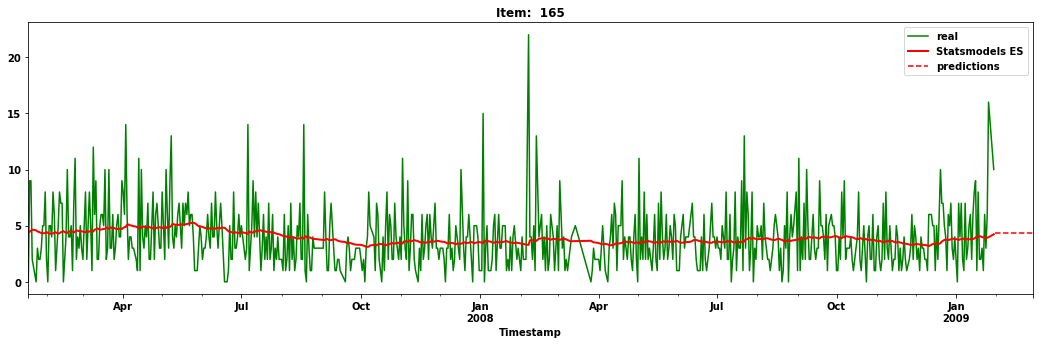

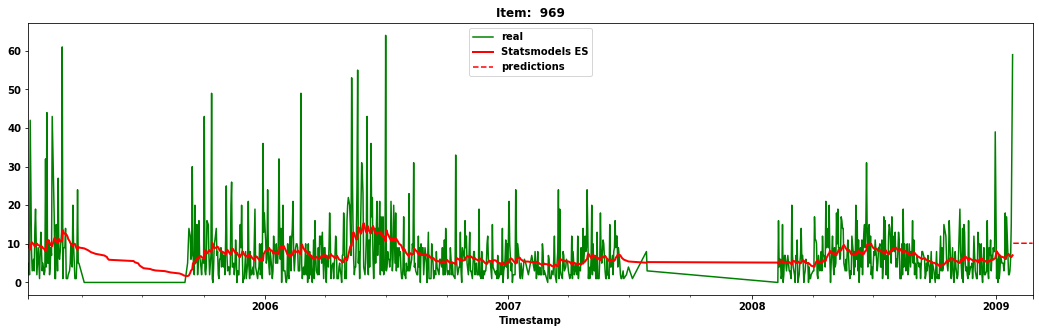

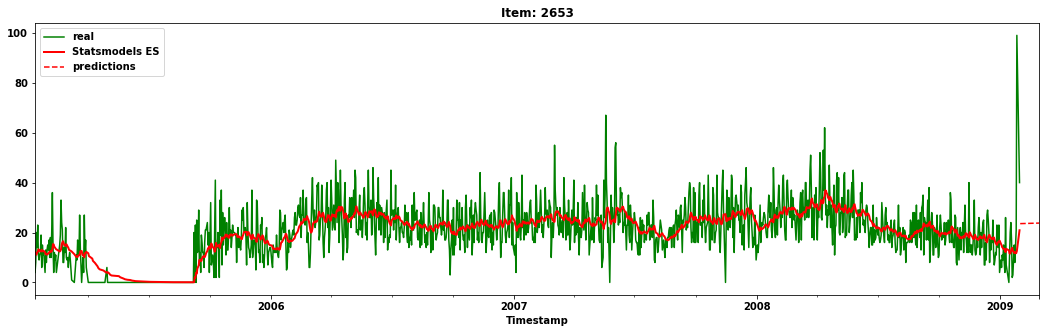

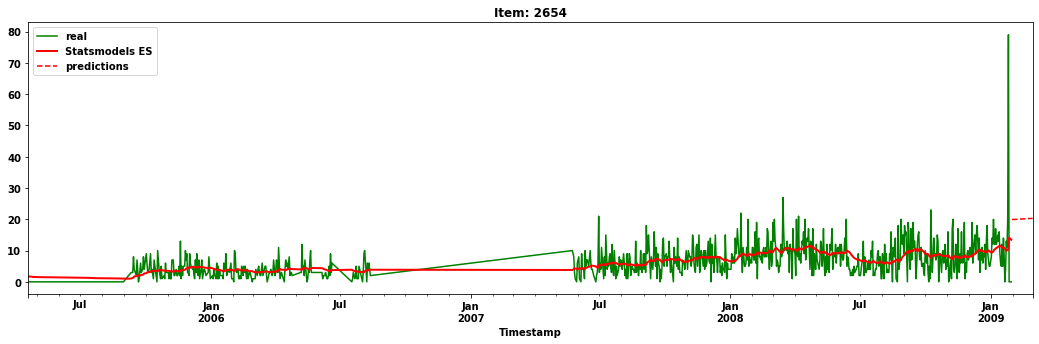

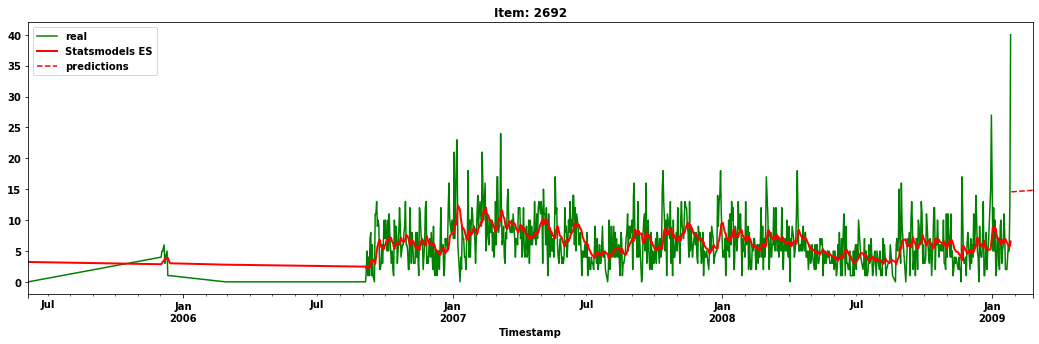

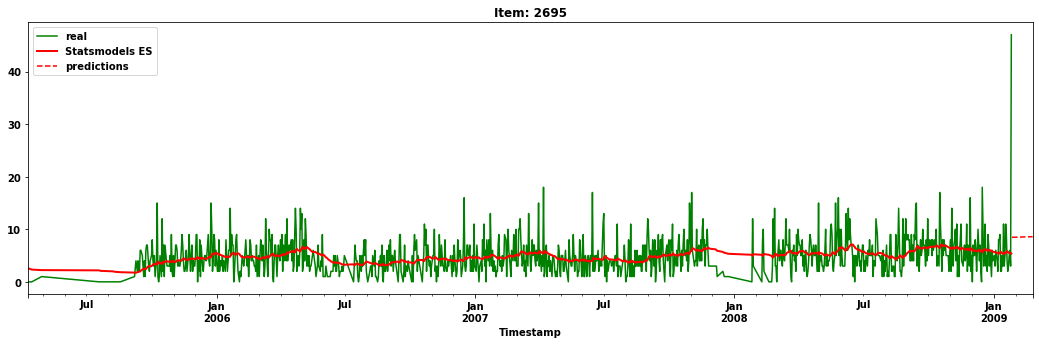

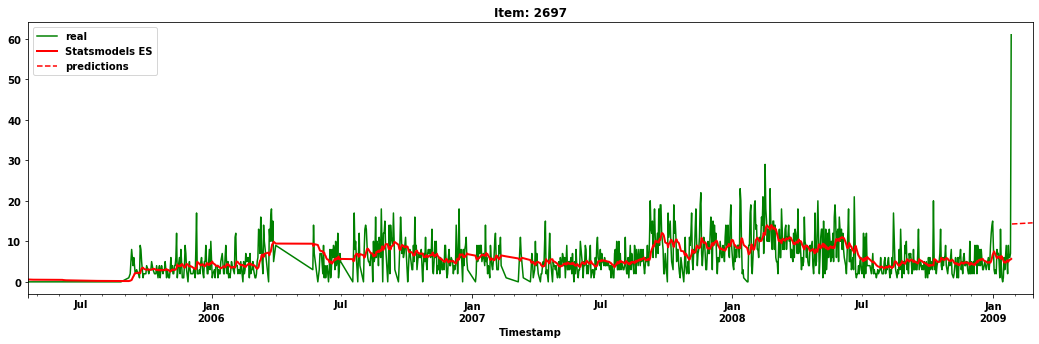

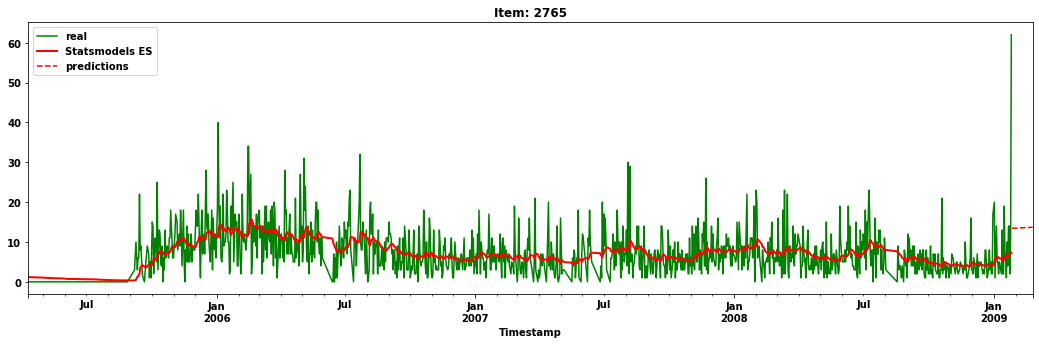

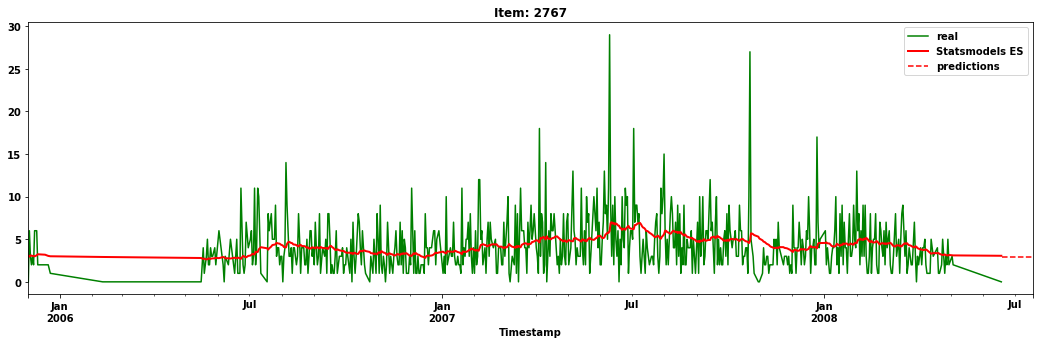

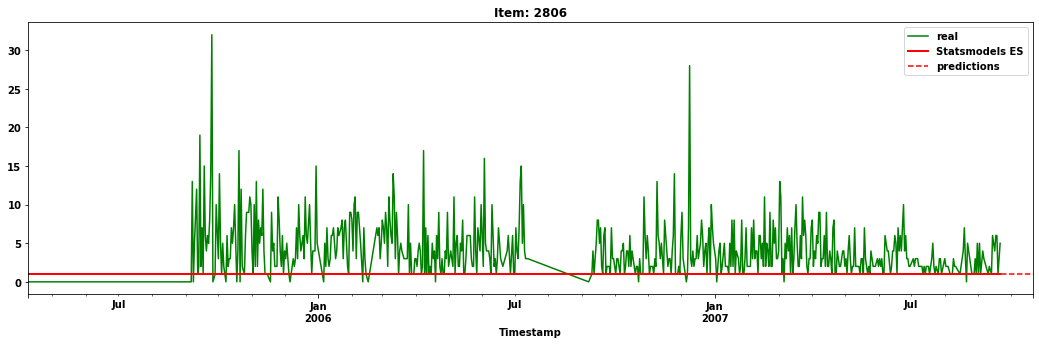

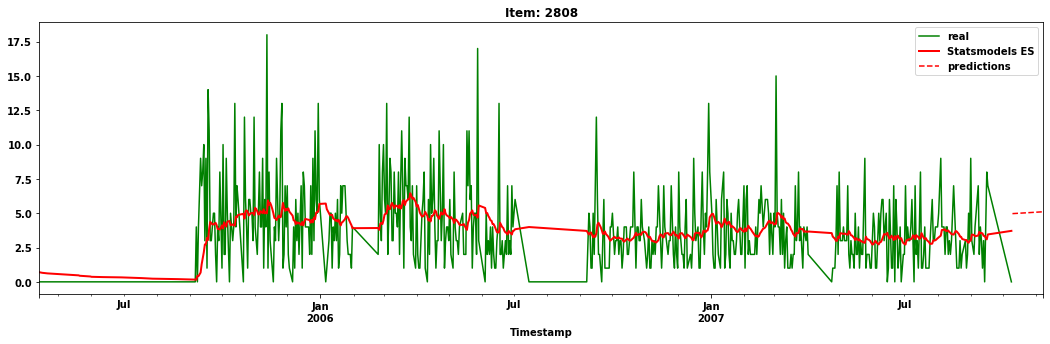

In [3]:
from statsmodels.tsa.api import Holt, ExponentialSmoothing

for col in ts.columns:
    df = ts[col].dropna().to_period(freq='D')
    fit = Holt(df).fit()
    fcast = fit.forecast(30) #поскольку предсказания константные, достаточно и периода=1, но на графике так лучше
        
    plt.figure(figsize=(18,5))
    ax = df.plot(figsize=(18,5), color='green', label='real')
    fit.fittedvalues.plot(ax=ax, style='-', lw=2, color='red', label='Statsmodels ES');
    fcast.plot(ax=ax, color='red', style='--', label='predictions')
    plt.title(col)
    plt.legend()
    plt.show();

## PyFlux

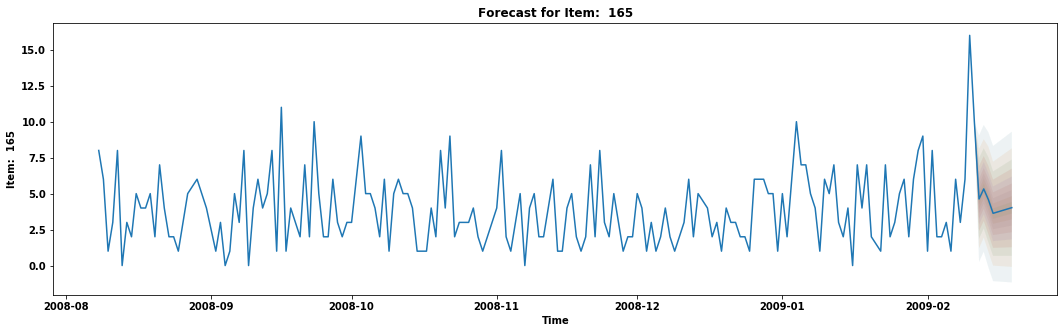

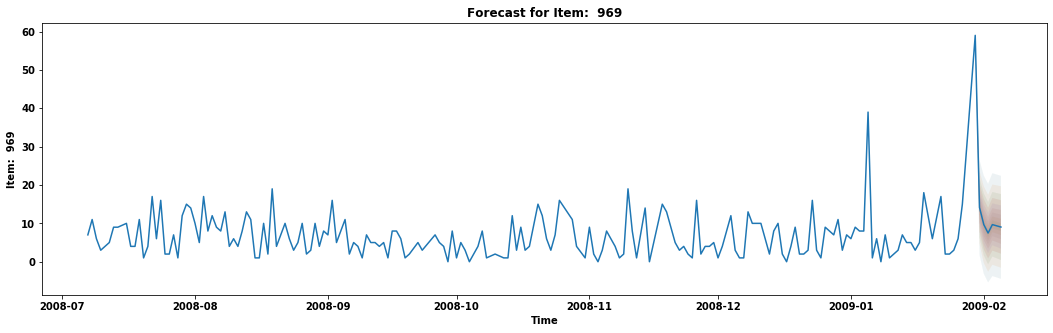

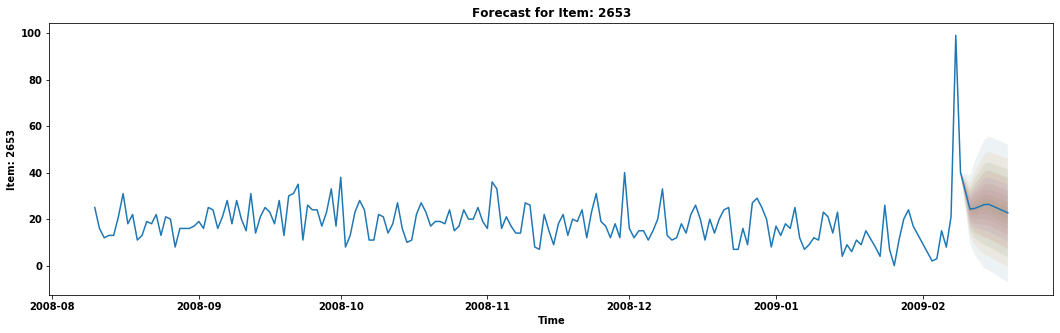

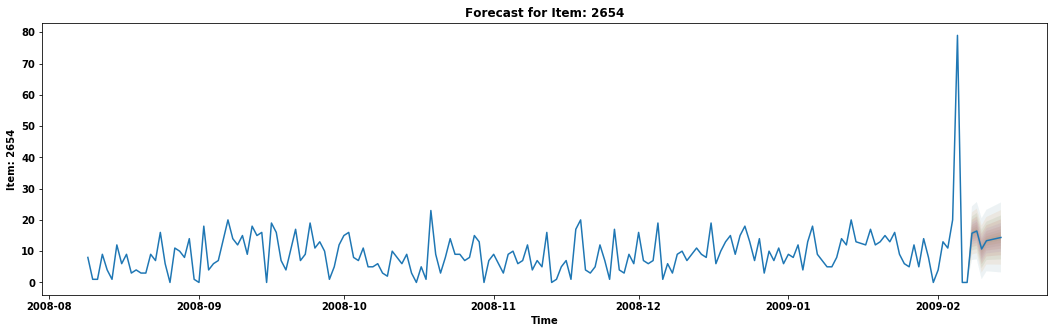

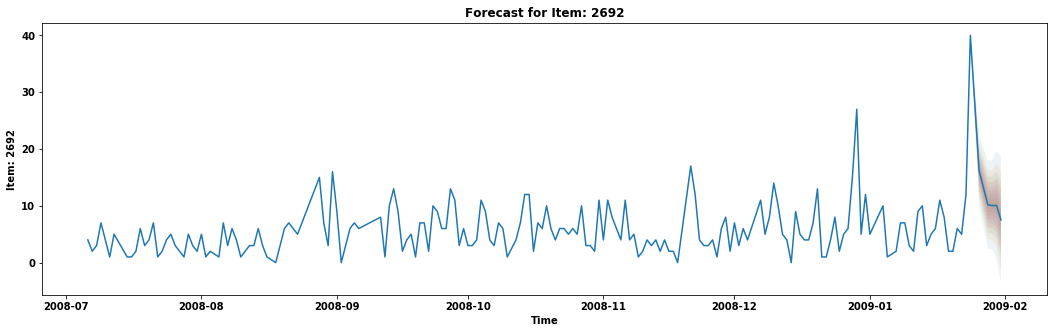

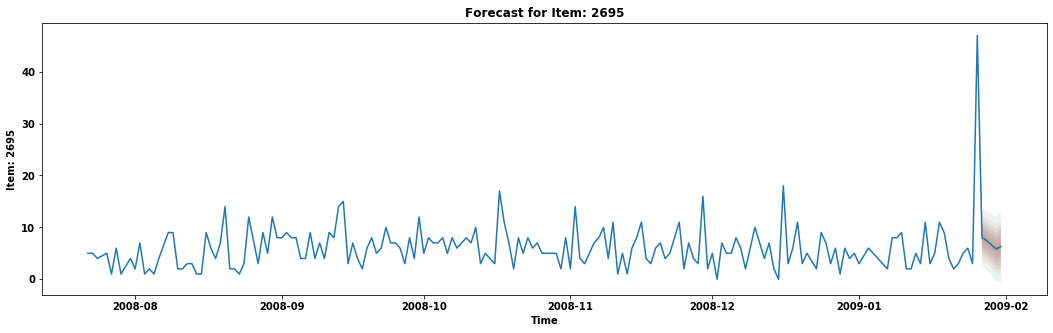

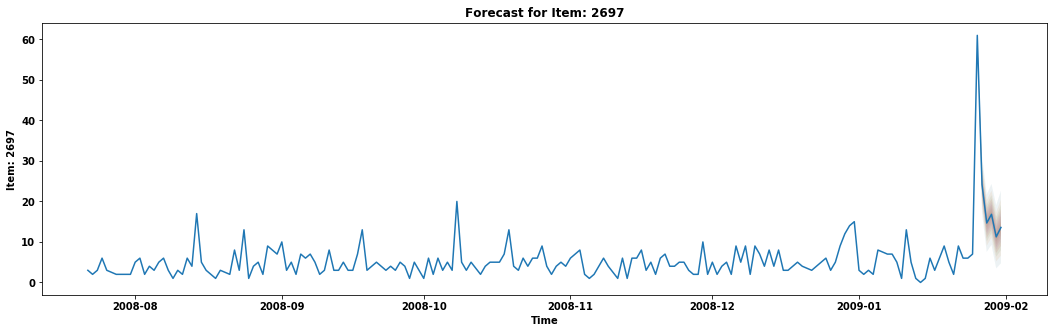

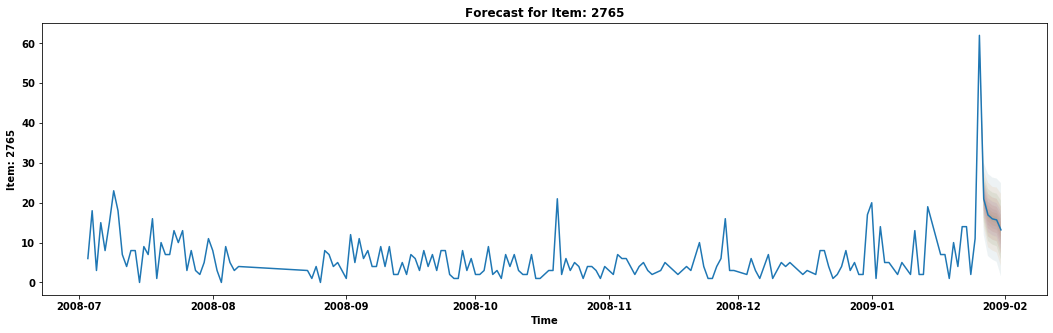

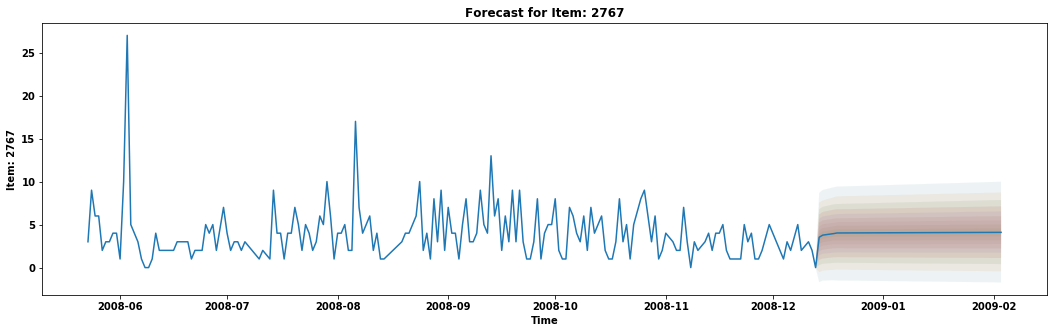

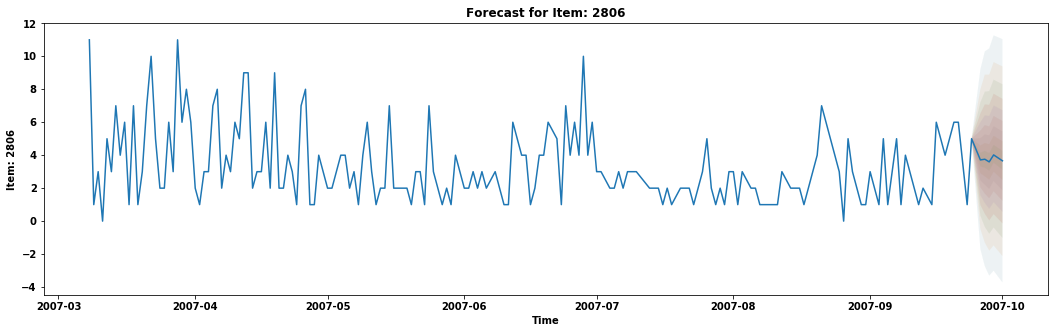

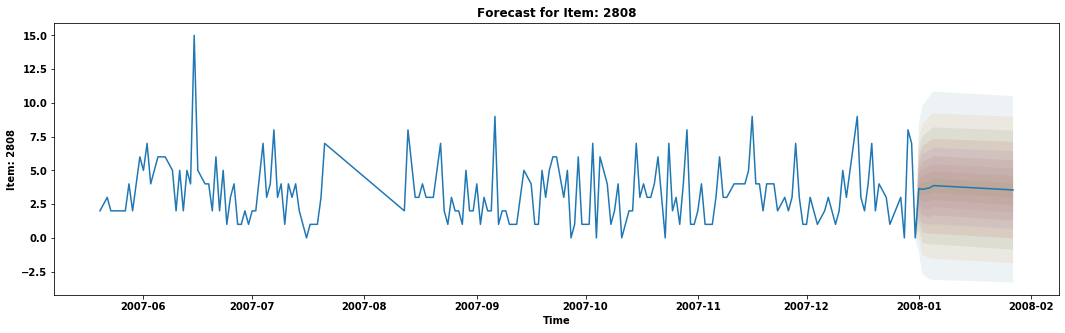

In [4]:
import pyflux as pf

for col in ts.columns:
    df = pd.DataFrame(ts[col].dropna())
    model = pf.ARIMA(data=df, ar=4, ma=4, family=pf.Normal())
    model.fit(method='MLE')
    model.plot_predict(h=5,past_values=180,figsize=(18,5))

## Предсказания в fbprophet
Prophet делает *честные* предсказания по дефолту - длину периода, на который делаются предсказания, можно задать параметром в **make_future_dataframe**.

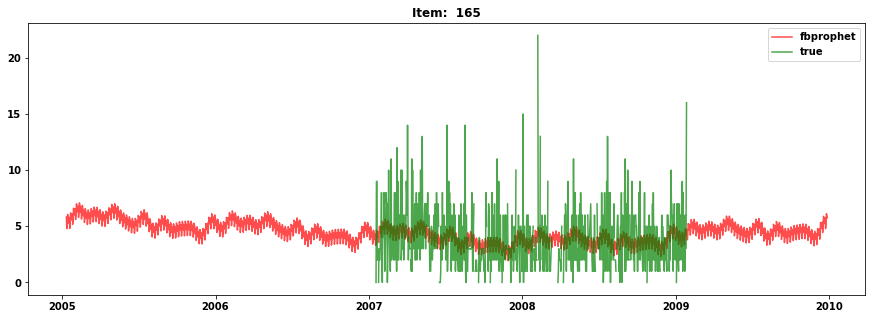

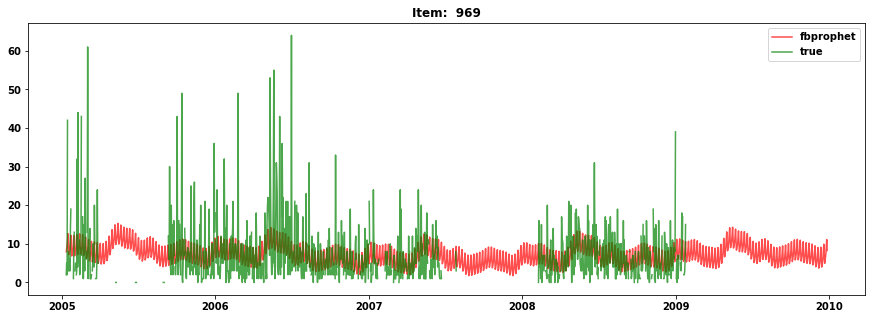

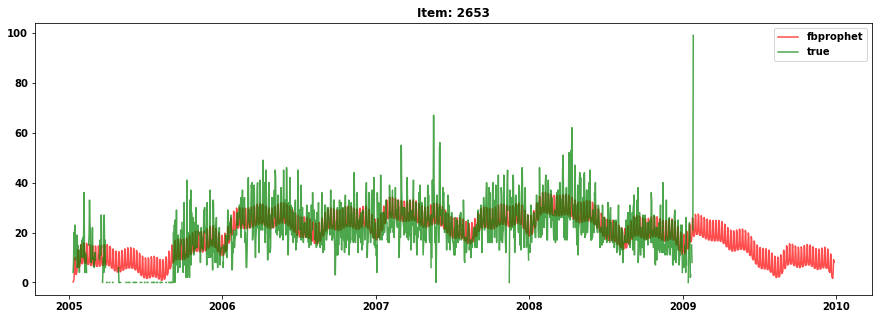

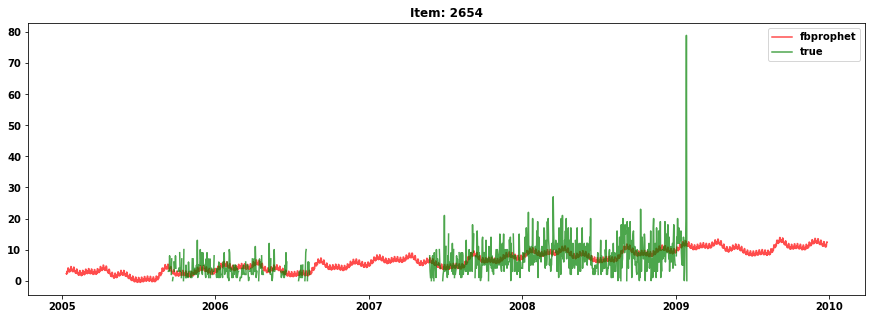

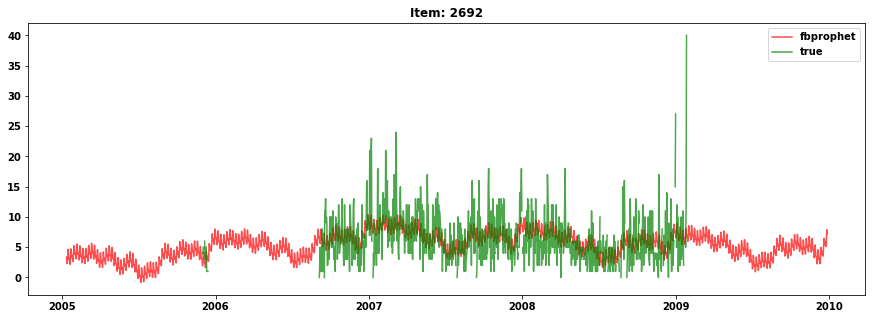

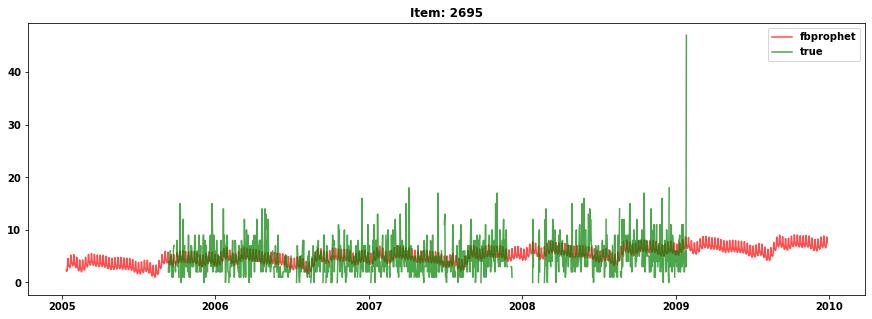

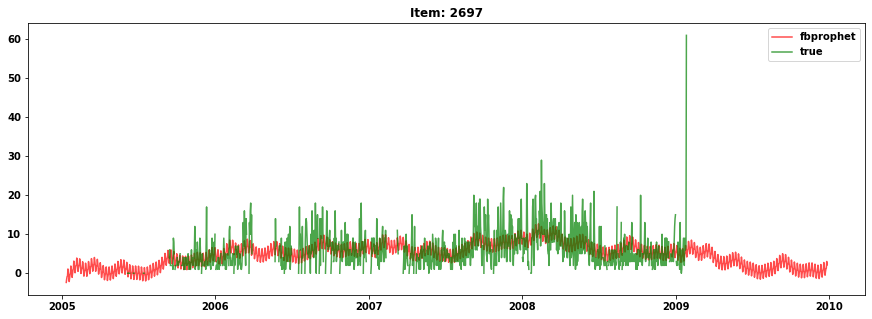

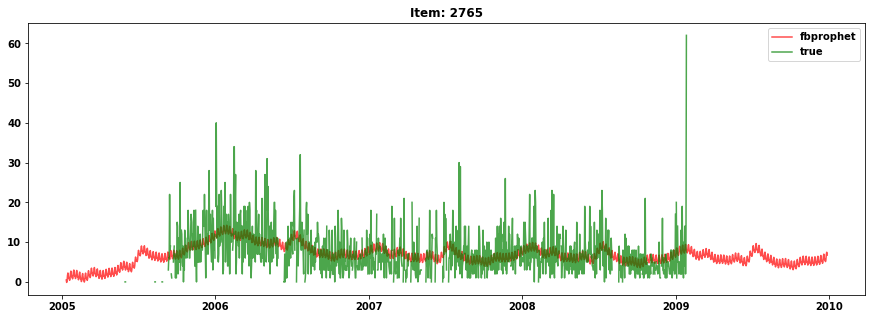

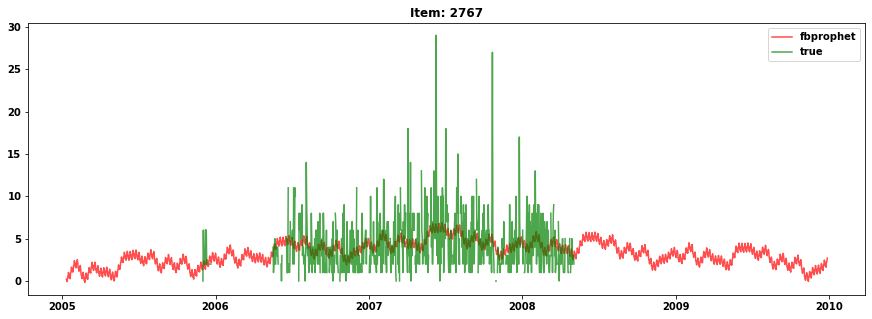

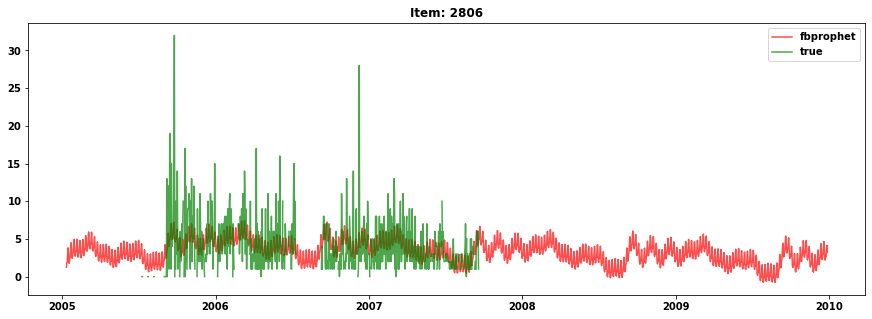

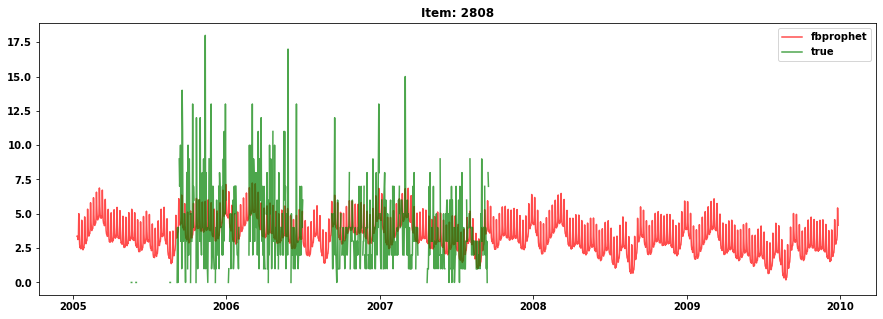

In [5]:
from fbprophet import Prophet

#suppressing the info logs
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)

for col in ts.columns:
    #creating a dataframe that fbprophet requires
    df = pd.DataFrame(ts[col])
    df['ds'] = df.index
    df.columns = ['y', 'ds']
    
    #making predictions
    m = Prophet()
    m.fit(df)
    #'make_future_dataframe' parameter decides how far into the future we're looking
    future = m.make_future_dataframe(300)
    forecast = m.predict(future)
    
    #plotting the results
    plt.figure(figsize=(15,5))
    plt.plot(forecast['ds'], forecast['yhat'], color='red', alpha=0.7, label='fbprophet')
    plt.plot(df['y'], color='green', alpha=0.7, label='true')
    plt.title(col)
    plt.legend()
    plt.show();